## Введение

Набор данных `weather.csv` содержит информацию о леднике Solheimajokull расположенном в Исландии. 

Данные:
* `AirTemp` - температура воздуха (°C).
* `Humidity` - влажность (%).
* `WindSpd` - сила ветра (м/с).
* `Date` - временная метка (30 минутный интервал).

#### Источники информации

* [The Pandas data analysis toolkit](http://chris35wills.github.io/courses/PythonPackages_pandas/)
* [Analyzing ice dynamics using Sentinel-1 data at the Solheimajoküll Glacier, Iceland](https://www.tandfonline.com/doi/full/10.1080/15481603.2020.1814031)
* [Solheimajokull A Geography Case Study](https://www.discover-the-world.com/study-trips/solheimajokull-a-geography-case-study/)


#### Проблематика

Изменение климата, является важным вопросом, к которому приковано внимание всего человечества. Однако однозначно сделать вывод о текущих тенденциях его изменения, не представляется возможным, так как накоплен не достаточный объем данных и процессы, происходящие в природе очень сложны.

В качестве примера можно привести исследование Diego Gómez, Pablo Salvador, Julia Sanz, Mikhail Urbazaev & José Luis Casanova (2020), в котором рассматривался вопрос об изменении климат Исладнии и влияние на него ледника Solheimajoküll. Исследование показало, что у ледника был как период охлаждения, так и период потепления на протяжении 1973-2018 гг.

<p style="text-align:center;"><img src='https://www.discover-the-world.com/app/uploads/2018/07/Solheimajokull-in-2007-download-1150x863-c-default.jpg' width="500"></p>

Источник: [Solheimajokull A Geography Case Study](https://www.discover-the-world.com/study-trips/solheimajokull-a-geography-case-study/)

В данной работе проведём исследование данных об этом леднике, но на более коротком временном промежутке.

#### Задачи

1. Загрузить данные при помощи pandas.
2. Ознакомится с набором данных.
3. Исследовать: Температуру, Влажность, Силу ветра.
4. Изучить корреляционную связь между данными показателями.
5. Сделать краткий вывод

## 1. Импорт библиотек и загрузка данных

In [27]:
# Установка необходимых версий библиотек
# Для установки необходимо раскомментировать строчки
# Для Colab достаточно обновить только matplotlib

# !pip install plotly==5.6.0
# !pip install pandas==1.3.5
# !pip install matplotlib==3.4.3 # Если ниже v3.4.2, то будет возникать ошибка с методом bar_label

In [28]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('./weather.csv', index_col='Date', parse_dates=True, sep=',')

df.head()

,AirTemp,Humidity,WindSpd
Date,,,
2013-08-28 17:00:00,12.1,63.8,0.3
2013-08-28 17:30:00,10.8,72.6,1.4
2013-08-28 18:00:00,10.5,73.5,2.0
2013-08-28 18:30:00,9.7,74.5,1.2
2013-08-28 19:00:00,9.8,75.9,1.8


Используя библиотеку `pandas` мы загрузили данные в DataFrame(`df`) с которым в дальнейшем будет работать. При загрузке мы указали, что в качества индекса будет использовать столбец с временными метками которые нужно преобразовать во временной тип данных, а также указали, что разделителем в `weather.csv` является запятая (`,`).

## 2. Общее описание набора данных

In [30]:
df.describe()

,AirTemp,Humidity,WindSpd
count,292.000000,292.000000,292.000000
mean,8.253767,75.866781,2.757192
std,1.627139,10.426909,2.199402
min,4.500000,45.100000,0.300000
25%,7.200000,68.800000,0.700000
50%,8.100000,75.850000,2.250000
75%,9.225000,84.675000,4.400000
max,18.400000,91.400000,8.500000


Набор данных содержит 292 записи по трём параметрам: температура, влажность, скорость ветра.  
Данные зафиксированы с интервалом в 30 минут на протяжении 6 дней (28 августа 2013 по 03 сентября 2013).

Метод `describe()` приводит стандартные статистические параметры наших рядов данных.

Можно отметить, что температура и влажность за 6 дней значительно колебалась:
* минимальная температура составила 4.5 градуса, а максимальная 18.4
* минимальная влажность - 45.1, максимальная - 91.4

Можно предположить, что между данными величинами есть связь.

## 3. Исследование рядов данных

In [31]:
def boxpolt(data, title='', outliers_color='black'):
    fig, ax = plt.subplots(figsize=(21, 9))
    ax.boxplot(data, notch=True, vert=False, sym=outliers_color)
    ax.set_xlabel(title, fontsize=14)
    ax.xaxis.grid(True)
    
    # Настройка меток на оси OX
    # xticks() принимаем список меток для отображения
    # range(start, end, step) - работает только с int -> делаем преобразование типов .astype('int')
    # np.floor() - округление в меньшую сторону, минимального значения в наборе данных.
    # np.ceil() - округление в большую сторону, +1 для включения самого значения.

    plt.xticks(range(np.floor(data.min()).astype('int'), 
                     np.ceil(data.max()).astype('int')+1, 
                     1))
    plt.show()


def barpolt(data, title='', period='24H', group=False, color='r'):
    fig, ax = plt.subplots(figsize=(21, 9))

    if group:
        data_avg = data.groupby(data.index.hour).mean()
        plt.xticks(range(0,24,1))
    else:
        data_avg = data.resample(period).mean()
    
    # Получаем контейнер с рисунком, в нём 7 объектов (столбцов)
    p1 = ax.bar(data_avg.index, data_avg, color=[color])

    # Добавляем подписи данных используя сохранённый объект,
    # Располагаем подписи у края - edge, 
    # Применяем форматирование к значениям и увеличиваем шрифт
    ax.bar_label(p1, label_type='edge', fmt='%.2f', fontsize=14)
    
    # Убираем рамку, устанавливаем цвет фона в как у plotly
    ax.set_frame_on(False)
    ax.set_facecolor('#e5ecf6')
    
    ax.set_xlabel(title, fontsize=14)

    plt.show()

### 3.1 Данные о температуре

Для ознакомления с рядом данных будем использовать график box polt ("ящик с усами"). На данном графике одновременно отражается несколько статистических характеристик.

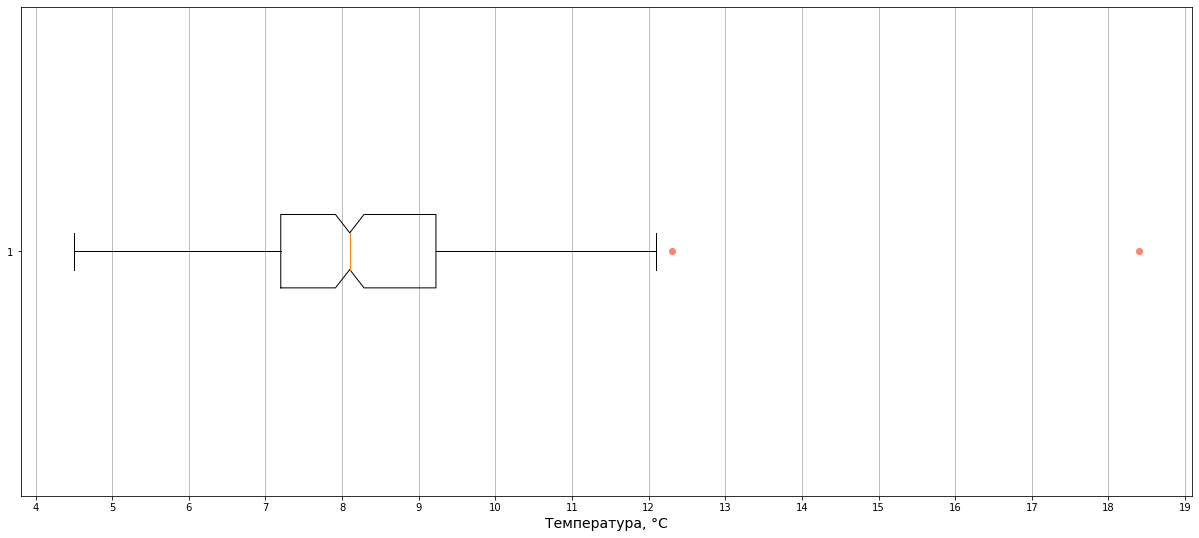

In [32]:
boxpolt(df['AirTemp'], title='Температура, °C', outliers_color='#ff826e')

"Тело" прямоугольника показывает интерквантильный размах (interquartile range - IQR) т.е. где расположены данные между Q1 - 25 перцентилем и Q3 - 75 перцентилем.

Засечка на фигуре обозначает медианное значение.

Можно сделать вывод, что температуры за 6 дней колебались около 8 градусов, в достаточно узком диапазоне примерно от 7 до 9 градусов.

На графике отчётливо видны два выброса (outliers) температуры, отмеченные красным цветом. Они выходят за границу $Q_3 + 1.5 * IQR$

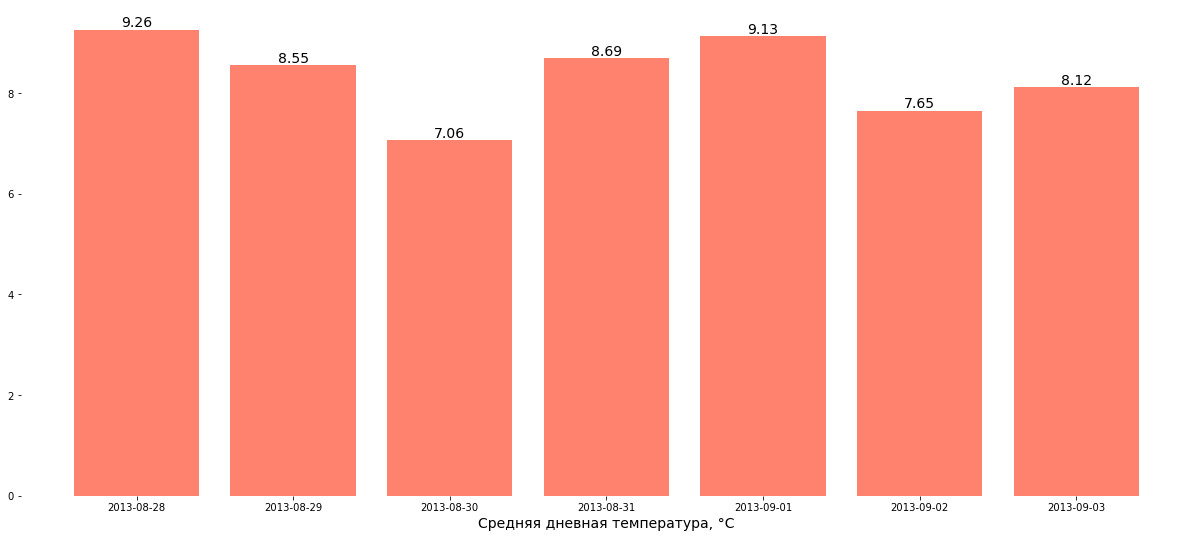

In [33]:
barpolt(df['AirTemp'], title='Средняя дневная температура, °C', color='#ff826e')

Bar chart (Столбиковая диаграмма), одна из самых универсальных и наглядных визуализаций. Она позволяет заметить, что в конце августа происходит постепенное снижение среднедневной температуры, но есть два аномальных дня 31 августа и 1 сентября.

### 3.2 Данные о Влажности

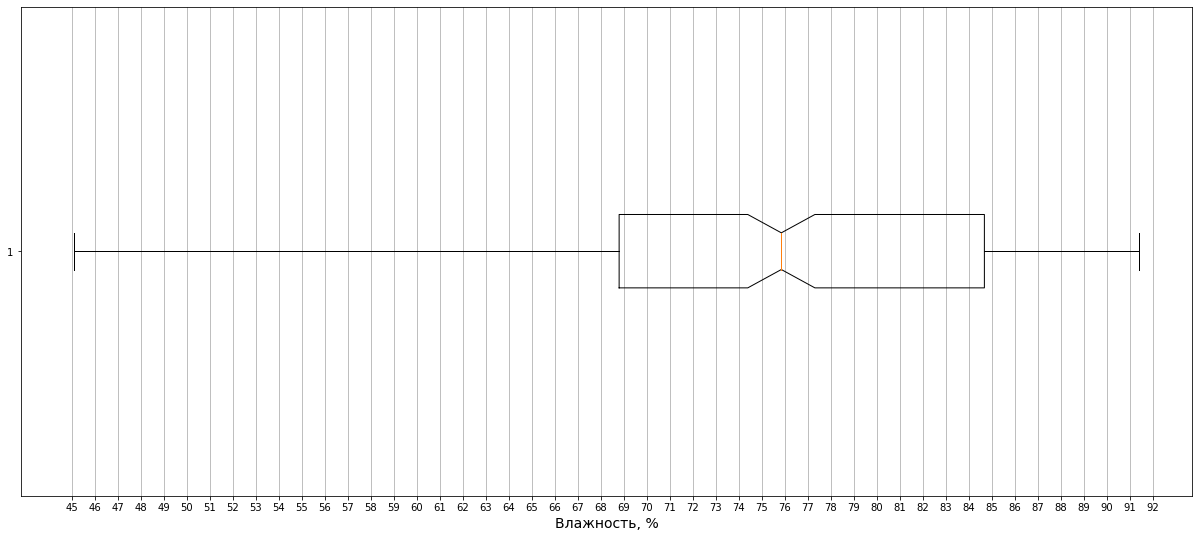

In [34]:
boxpolt(df['Humidity'], title='Влажность, %', outliers_color='#848df9')

Box plot для показателя влажности, показал, что показатель влажности более изменчивый и изменяется в широких диапазонах. При этом можно отметить, что были достаточно "сухие" дни, когда показатель снижался менее чем 69%. Однако выбросы в данном показатели не наблюдаются.

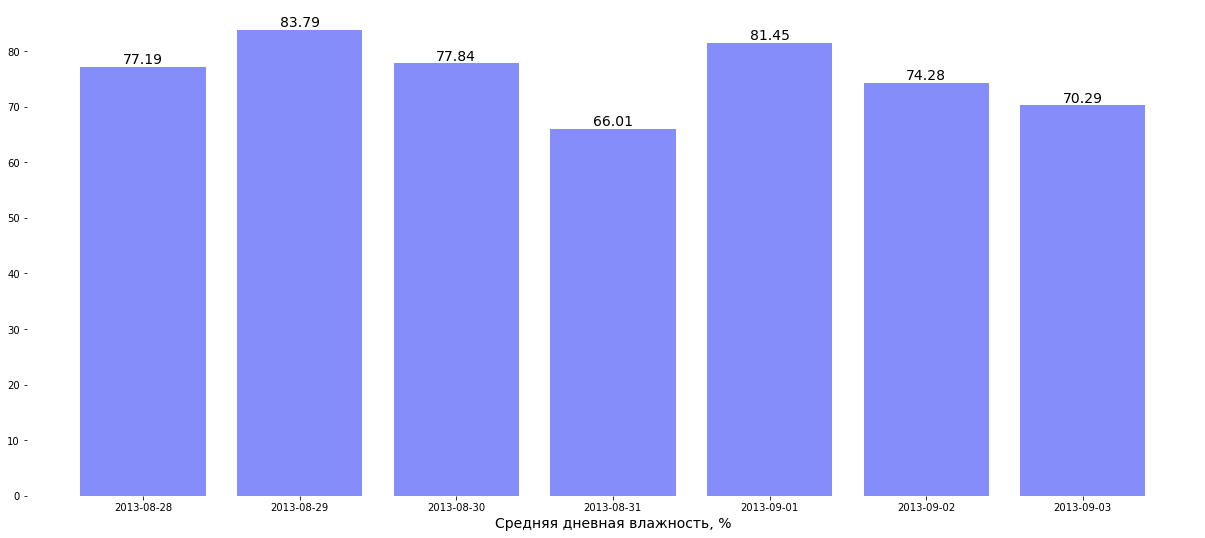

In [35]:
barpolt(df['Humidity'], title='Средняя дневная влажность, %', color='#848df9')

Данная диаграмма показывает, что так же как и при снижении температуры, происходит постепенное снижение влажности, но можно отметить, что данный показатель имеет большую инерцию. Т.е. при росте температуры 31 августа, показатель влажности вырос 1 сентября и далее более плавно снижался чем показатель температуры.

### 3.3 Данные о Силе ветра

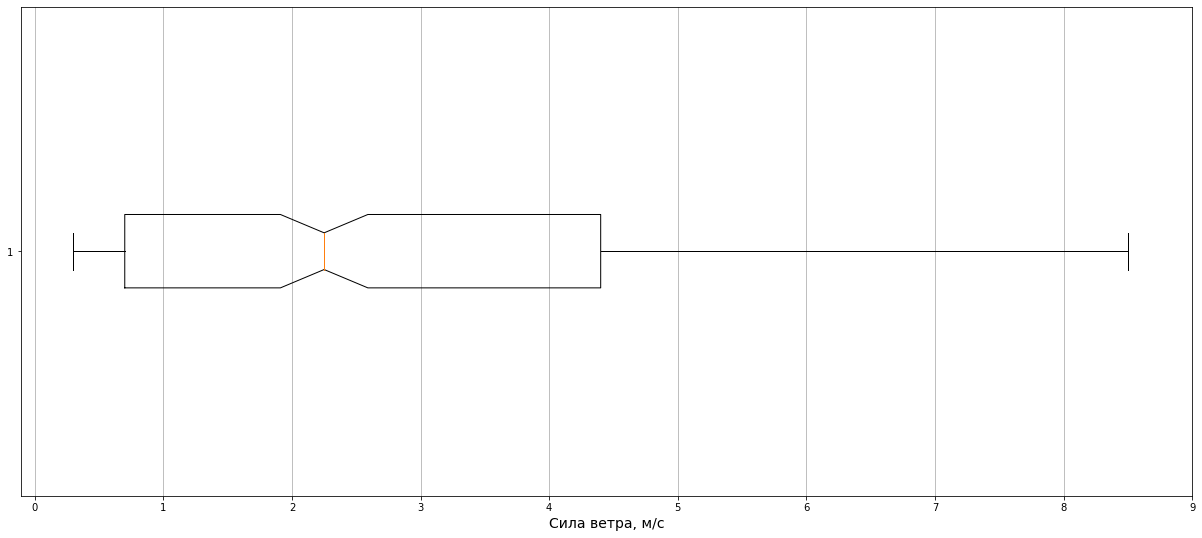

In [36]:
boxpolt(df['WindSpd'], title='Сила ветра, м/с', outliers_color='#33cfa5')

Показатель силы ветра - преимущественно значения сконцентрированы от 1 до 4 м/с, но при этом наблюдаются отдельные достаточно ветреные дни. Выброс так же как и для влажности не обнаружились.

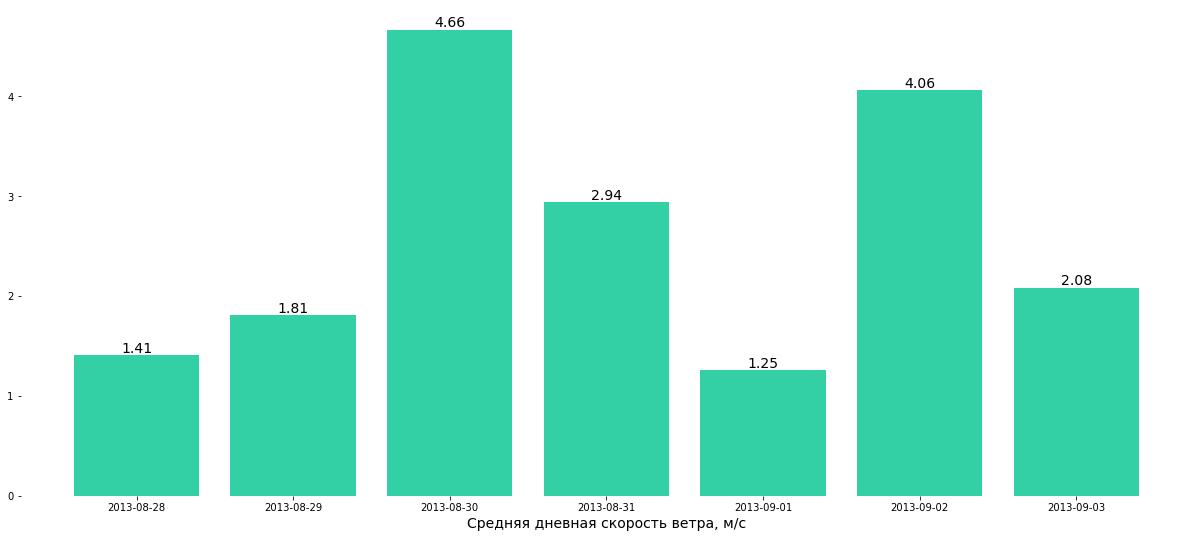

In [37]:
barpolt(df['WindSpd'], title='Средняя дневная скорость ветра, м/с', color='#33cfa5')

В отношении скорости ветра сделать какие либо выводы не возможно, показатель достаточно сильно колебался день от дня.

Возможно если сгруппировать данные в часовом разрезе, удастся выявить закономерности.

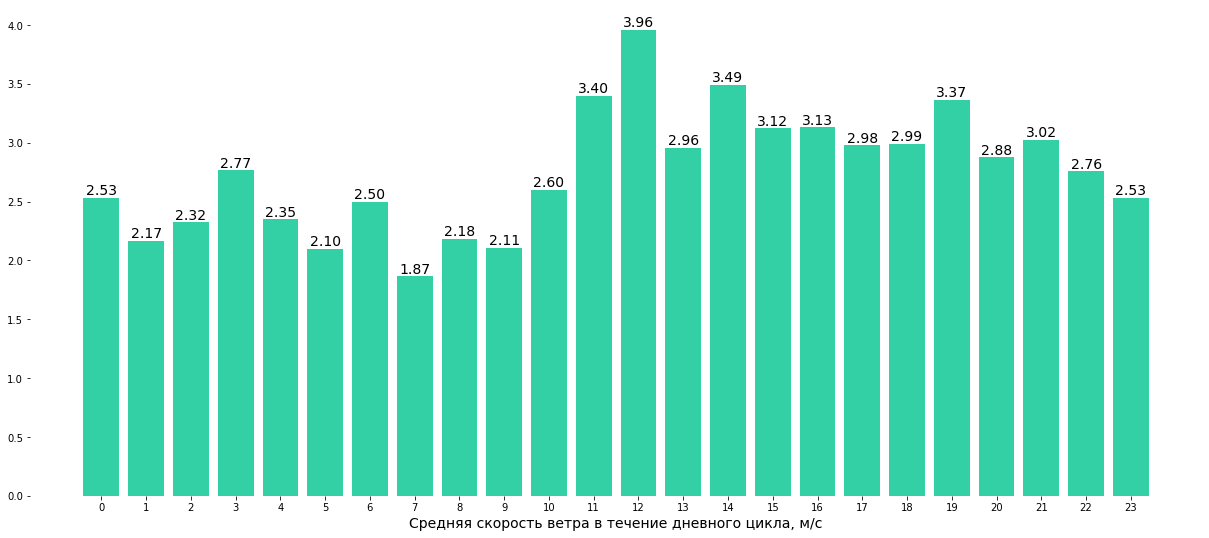

In [38]:
barpolt(df['WindSpd'], title='Средняя скорость ветра в течение дневного цикла, м/с', group=True, color='#33cfa5')

Как показывает график, можно отметить, что с полуночи до 10 утра на леднике наблюдается затишье, с 11 до 19 ветер набирает большую силу и с 20 часов начинает затихать.

### 3.4 Интерактивный график: AirTemp, Humidity, WindSpd

Для того, чтобы пользователь мог в наглядном виде ознакомиться с данным, разместим их на интерактивном графике.

Данная визуализация позволяет:
* Выбирать какую переменную пользователь будет изучать.
* Приближать данные, чтобы лучше рассмотреть отдельные измерения.
* Выбирать, какие данные отразить на визуализации можно при помощи кнопок или выбирая значения на легенде.

In [39]:
# создаётся полотно и размещаются все данные 
paper = go.Figure(
        data=[
            go.Scatter(x=df.index, y=df.AirTemp, name='AirTemp', mode='markers+lines', line=dict(color="#ff826e")),
            go.Scatter(x=df.index, y=df.Humidity, name='Humidity', mode='markers+lines', line=dict(color="#848df9")),
            go.Scatter(x=df.index, y=df.WindSpd, name='WindSpd', mode='markers+lines', line=dict(color="#33cfa5"))
            ])

# специальный метод добавляющий интерактивность
paper.update_layout(
    # настройка меню
    updatemenus=[
        # создаются кнопки
        dict(
            type = "buttons",
            direction = "left",
            buttons=list([
                # Первая кнопка
                dict(
                    label="Температура воздуха",
                    method="update",
                    args=[{"visible": [True, False, False]}, # Указывается, какие данные должны выводится на график т.е. вывести только первый, второй и третий не выводить.
                          {"title": "Температура воздуха, °C",}],
                ),
                # Вторая кнопка
                dict(
                    label="Влажность",
                    method="update",
                    args=[{"visible": [False, True, False]},
                          {"title": "Влажность, %"}],
                ),
                dict(
                    label="Сила ветра",
                    method="update",
                    args=[{"visible": [False, False, True]},
                          {"title": "Сила ветра, м/с"}],
                ),
                dict(
                    label="ALL data",
                    method="update",
                    args=[{"visible": [True, True, True]},
                          {"title": "All Data"}],
                )
            ]),
            # Где располагаются кнопки (левый верхний угол, выше, чем основное полотно графика)
            pad={"r": 1, "t": 1},
            showactive=False,
            x=0.0,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)


paper.show()

## 4. Корреляционная связь между переменными

### 4.1. Начальный набор данных

Для ознакомления с общим видом взаимного расположения данных, визуализируем их при помощи Диаграммы рассеивания (Scatter plot). Данный тип визуализации позволит посмотреть на данные и выявить возможные взаимосвязи между изучаемыми величинами, а также покажет анаталии.

Также построим гистограмму (histogram plot) которая позволит визуально оценить вероятностное распределение значений и рассчитаем коэффициенты корреляции $R$.

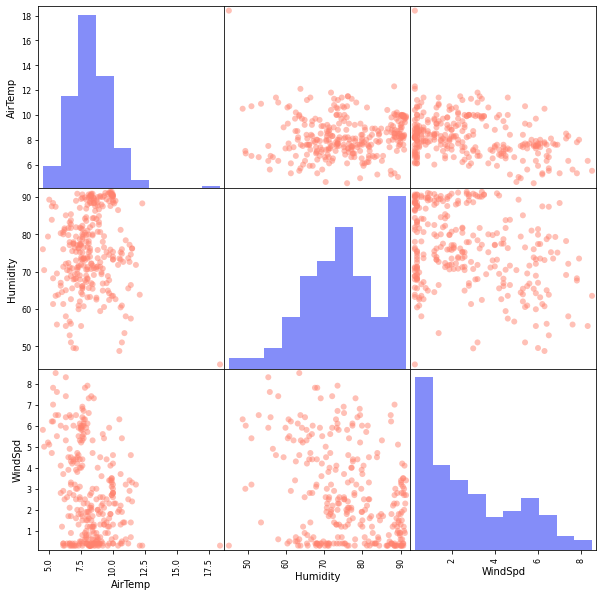

In [40]:
# bins - параметр влияет на гистограммы (сколько столбиков делать)

scatter_matrix = pd.plotting.scatter_matrix(df, color='#ff826e', marker='o', hist_kwds={'bins': 10, 'color':'#848df9'}, figsize=(10, 10), )

In [41]:
df_corr = df.corr()
df_corr.style.background_gradient(cmap='Greens')

,AirTemp,Humidity,WindSpd
AirTemp,1.000000,0.032906,-0.327726
Humidity,0.032906,1.000000,-0.322466
WindSpd,-0.327726,-0.322466,1.000000


Как видно по иллюстрации выше, корреляционная связь не прослеживается на диаграмме рассеивания. Точки расположены достаточно хаотично, но наглядно видна аномалия в температуре.

Если рассматривать коэффициент корреляции $R$, то можно отметить, что присутствует слабая корреляционная связь (по шкале Чеддока) между:
* Температурой и скоростью ветра.
* Влажностью и скоростью ветра.

Корреляционная связь между влажностью и температурой отсутствует.

Гистограммы показывают, что для влажности и скорости ветра наблюдается смещение относительно их среднего значения, график температуры больше похож на нормальное распределение.

### 4.2. Сглаживание значений - скользящая средняя

Предположим, что влажность менее подвижный параметр и запаздывает относительно температуры воздуха, который более динамично изменяется в течение дня.

Проведём усерднее значений при помощи скользящей средней, а также избавимся от выброса данных, который похож на технический сбой датчика (`18.4 °C`)

Рассчитаем скользящую среднюю с интервалом 24:
* в сутках 24 часа или 1440 минут,
* интервалы в наборе данных заданы 30 минутами, 
* в сутках получается 48 периодов.

Исследую скорость ветра мы увидели, что можно условно выделить два периода. Исходя из этого в качества интервала зададим 24 интервал окна или 12 часов.

In [42]:
# 291 - не берём последнее значение т.к. это выброс
df_new = df[:291].copy(deep=True)
# Указываем окно для расчёта среднего значения, обрезам первые значения т.к. они Nan
df_new = df_new.rolling(window=24).mean().iloc[23:]
df_corr = df_new.corr()
df_corr.style.background_gradient(cmap='Greens')

,AirTemp,Humidity,WindSpd
AirTemp,1.000000,0.363284,-0.618316
Humidity,0.363284,1.000000,-0.451169
WindSpd,-0.618316,-0.451169,1.000000


Полученные значения показывают, что между температурой и влажностью присутствует корреляционная связь.

Визуализируем усреднённые значения на 3D плоскости.

Интерактивный график позволяет пользователю:
* визуально рассмотреть как температура и скорость ветра определяют влажность:
  * Ось OY - скорость ветра.
  * Ось OX - температура.
  * Ось OZ - влажность.
* Можно заметить, что с ростом температуры и уменьшением скорости ветра, % влажности увеличивается.
  * Температура ускоряет таяние ледника.
  * При отсутствии ветра, влага не сносится с ледника.

In [43]:
from scipy.interpolate import griddata

# Создаём координатные оси берём мин и макс значения
# получаем 24 раномерно распределённых на этом отрезке значений
xi = np.linspace(min(df_new['AirTemp']), max(df_new['AirTemp']), num=24)
yi = np.linspace(min(df_new['WindSpd']), max(df_new['WindSpd']), num=24)

# Создаём сетку из значений для отрисовки 3D графика
# Полное объяснение https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy
x_grid, y_grid = np.meshgrid(xi,yi)

# интерполяция данных - отдельные точки полученные выше, превращаем в поверхность,
# используем метод "ближайший"(nearest) - картинка более наглядная - получается "полочками"
# можно также использовать linear, cubic
# при использовании cubic получается плавнее, но образуются "выбросы" более 100%
# Подробности (см. рисунок внизу) - https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
z_grid = griddata((df_new['AirTemp'], df_new['WindSpd']), df_new['Humidity'],(x_grid,y_grid), method='nearest')

fig = go.Figure(go.Surface(x=x_grid, y=y_grid, z=z_grid, colorscale='viridis'))

fig.update_layout(title='Зависимость влажности от температуры и скорости ветра', autosize=False,
                  width=600, height=600,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

## 5. Заключение

Можно сделать следующие выводы:
* Происходит постепенно снижение температуры и влажности, на леднике заканчивается "летний" сезон.
* Данные в силе ветра показывают, что на леднике есть два периода: затишье с 00 до 10 и усиление ветра с 10 до 19.
* Была выявлена одна температурная аномалия, можно предположить, что произошёл сбой в датчике собирающим показания температуры (`18.4 °C`)
* Была сделано предположение, что между показателем влажности и температурой присутствует корреляционная связь, но коэффициент корреляции этого не показал.
* Была обнаружена слабая связь между: температурой и скоростью ветра; влажностью и скоростью ветра.
* Было выдвинуто предположение, что применение скользящей средней позволит снизить "динамичность" изменений параметров и обнаружить корреляционную связь между параметрами.
  * Данное предположение подтвердилось, была обнаружена корреляция между:
    * Температурой и Влажностью - прямая связь.
    * Силой ветра и Влажностью - обратная связь.